# QOSF Cohort 7 Screening Tasks
## Task 3: QSVM
Generate a Quantum Support Vector Machine (QSVM) using the iris dataset and try to propose a kernel from a parametric quantum circuit to classify the three classes(setosa, versicolor, virginica) using the one-vs-all format, the kernel only works as binary classification. Identify the proposal with the lowest number of qubits and depth to obtain higher accuracy. You can use the UU† format or using the Swap-Test.

In [1]:
from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

from qiskit import BasicAer
from qiskit.circuit.library import ZZFeatureMap
from qiskit_machine_learning.kernels import QuantumKernel

In [2]:
class IrisDataset:
    def __init__(self, test_ratio):
        self.test_ratio = test_ratio
        self.__load()
        self.__preprocess_data()
        self.__split_train_test()
    
    def __load(self):
        iris = datasets.load_iris()
        self.x, self.y = iris.data, iris.target

    def __preprocess_data(self):
        self.x = MinMaxScaler().fit_transform(self.x)

    def __split_train_test(self):
        self.data = train_test_split(
            self.x, self.y, stratify=self.y, test_size=self.test_ratio
        )

    def load(self):
        return self.data

In [3]:
# Load Iris dataset
dataset = IrisDataset(test_ratio=0.5)
x_train, x_test, y_train, y_test = dataset.load()

In [4]:
# Create the quantum feature map
feature_map = ZZFeatureMap(
    feature_dimension=4,
    reps=1,
    entanglement='linear'
)

# Create the quantum kernel
kernel = QuantumKernel(
    feature_map=feature_map,
    quantum_instance=BasicAer.get_backend('statevector_simulator')
)

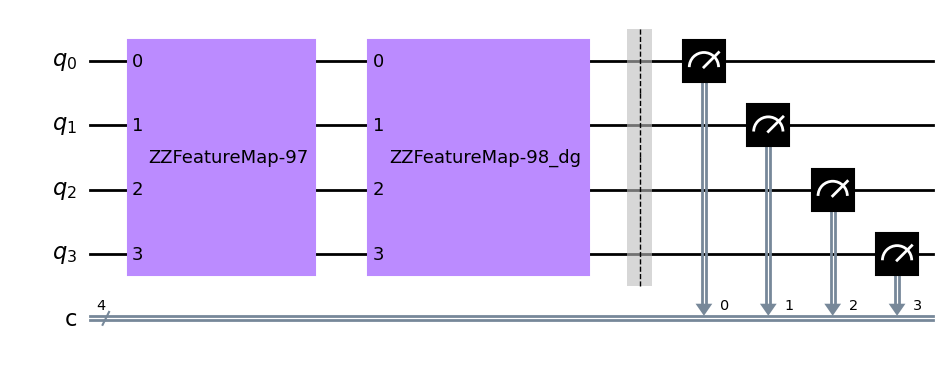

In [5]:
# Check: Fidelity kernel (UU† format)
kernel.construct_circuit(x_train[0]).draw('mpl')

In [6]:
# Use one-versus-rest strategy
svm = SVC(kernel=kernel.evaluate, decision_function_shape='ovr')
svm.fit(x_train, y_train)
svm.score(x_test, y_test)

1.0